# PCA analysis on pollen spectra
#### started on 30/06/21


started from a demo code by statquest

First, I will try on simple dataset:
- One excitation wavelength
- no filtering of the data


In [ ]:
%matplotlib inline

In [83]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
 

# Preparation of data
#########################

# load the whole dataset (excitation wavelength=365nm)

data = pd.read_csv('/Users/christine/Documents/Data/Pollen/KnownSpecies_Emission_390nm.csv')

wavelength = data.index+440
pelotes = data.columns

#print(pelotes)
#print(wavelength)

# Center and scale the data
scaled_data = preprocessing.scale(data.T)

print(scaled_data.shape)



(361, 301)


A few comments before going further: 
- I had to remove the last few lines because I could not manage NaN values generated in the shorter rows (check the initial data sheet to understand what I am talking about)
- by default, the indexes are from 0 to len(indexes). I added 440 which is the first emission wavelength. This way the indexes now reflect the emission wavelength, which will be important in the end to check the most influent ones in the PC.

In [94]:
from matplotlib import cm
colors = cm.get_cmap('gist_ncar', 14)

fc=list()
print(fc)
for x in range(42):
    fc.append(colors(0))
for x in range(20):
    fc.append(colors(1))
for x in range(20):
    fc.append(colors(2))
for x in range(42):
    fc.append(colors(3))
for x in range(20):
    fc.append(colors(4))
for x in range(20):
    fc.append(colors(5))
for x in range(60):
    fc.append(colors(6))
for x in range(20):
    fc.append(colors(7))
for x in range(19):
    fc.append(colors(8))
for x in range(20):
    fc.append(colors(9))
for x in range(18):
    fc.append(colors(10))
for x in range(20):
    fc.append(colors(11))
for x in range(20):
    fc.append(colors(12))
for x in range(20):
    fc.append(colors(13))


print(len(fc))

[]
361


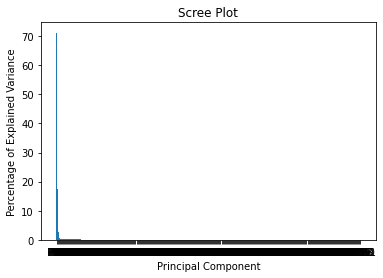

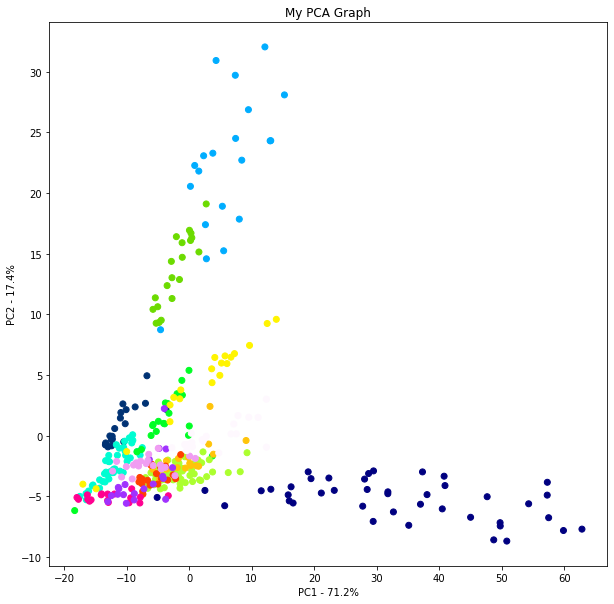

In [95]:

# Perform PCA on the data
#########################

 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 

# Draw a scree plot and a PCA plot
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC'+ str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')


plt.savefig('ScreePlot.jpg', dpi=600)
plt.show()


#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=pelotes, columns=labels)


fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(pca_df.PC1, pca_df.PC2, axes=ax, c=fc)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.savefig('PCA.jpg', dpi=600)
plt.show()
 


**Il faudrait ajouter une légende, l'ordre d'apparence est le suivant (à faire correspondre avec la liste de couleur)**

- 'scabieuse maritime'
- 'Quercus type ilex'
- 'Echium type vulgare'
- 'Diplotaxe fausser roquette/Plantain'
- 'Scabieuse des champs'
- 'Vitis'
- 'Rhus Coriara'
- 'Grenadier'
- 'Chardon du Canada'
- 'Barkhausie fétide'
- "Ronce à feuilles d'orme"
- 'Rosacée arbustive prunus type'
- 'Onagracée'
- 'Rosacée non ligneuse type Geum ou Rubus'




## Conclusions : 

On voit que les données clusterisent déjà pas mal. Quelques pistes pour améliorer:
- rajouter les émissions dans les autres longueurs d'onde (pour cela, je concaténerais les tableaux de valeurs, mais il faut bien documenter la liste d'indexes. Bon courage pour ça, vous risquez de vous arracher les cheveux !! (ce n'est pas vital pour construire le PCA, mais par contre ce sera compliqué pour interpréter les top hits dans la contribution à la clusterisation)
- si cela ne suffit pas, on pourra représenter en 3D (il faudra bidouiller un peu)


In [96]:
# Determine which wavelengths had the biggest influence on PC1
#########################
 
## get the name of the top 10 measurements (wavelength) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=wavelength)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the top 10 wavelengths
top_10_wl = sorted_loading_scores[0:10].index.values
 
## print the wavelengths and their scores (and +/- sign)
print(loading_scores[top_10_wl])

614    0.066132
616    0.066075
618    0.066059
615    0.066042
619    0.066033
612    0.066027
611    0.066019
613    0.065997
622    0.065977
621    0.065952
dtype: float64
